In [43]:
import numpy as np
import pandas as pd
import csv
import struct
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [86]:
# functions

def read_roti(filename):
    with open(filename, 'rb') as f:
        header_read = False
        date = None
        lats = []
        rows = []
        line = f.readline()
        while not header_read or (line.strip() and not line.strip().startswith(b"END OF ROTIPOLARMAP")):
            if line.strip().startswith(b"START OF ROTIPOLARMAP"):
                header_read = True
            elif line.strip().startswith(b"END OF ROTIPOLARMAP") or line.strip().startswith(b"END OF FILE"):
                break
            elif not header_read:
                pass
            elif line[0:5].strip():
                date = datetime(int(line[0:7]), int(line[7:14]), int(line[14:21]))
            else:
                lat, lon_start, lon_end = float(line[3:9]), float(line[9:15]), float(line[15:21])
                lats.append(lat)

                block = [f.readline() for _ in range(18)]
                row = np.genfromtxt(block)
                rows.append(row.ravel())
            line = f.readline()
        return date, np.array(lats), np.array(rows)

def plot_data_roti(date, lons, lats, map):
    lons, lats = np.meshgrid(lons, lats)

    fig1 = plt.figure()
    ax = fig1.add_subplot(111, projection='polar')
    levels = np.arange(0, 0.8, 0.1)
    cc = ax.contourf(np.deg2rad(lons), 90. - lats, map, levels=levels, extend='both')

    plt.title("ROTI index date: " + str(date))

    plt.colorbar(cc, ax=ax, label="ROTI, TECU/min")

    mlt = np.linspace(0, 24, 49)

    plt.show()

def read_dst(filename):
    with open(filename, 'rb') as f:
        dst_arr = []
        # dst_daily = []
        # date = None
        day = 0
        month = 0
        year = 0

        while day != 31 or month != 12 or year != 2020:
            dst_daily = []
            date = []

            line = f.readline()

            year = int(2000 + int(line[3:5]))
            month = int(line[5:7])
            day = int(line[8:10])
            date.append(day)
            date.append(month)
            date.append(year)
            dst_daily.append(date)

            if len(line) > 121:
                index_string = line[21:len(line)]
            else:
                index_string = line[21:120]
            # index_string = line[21:117]
            # print(index_string)
            # print(type(index_string))
            index_value = index_string.split()
            for value in index_value:
                val = float(value.decode())
                dst_daily.append(val)
            # print(type(index_value))
            dst_daily.pop(-1)
            dst_arr.append(dst_daily)
            # date = datetime(year, month, day)
        
        return dst_arr

def read_f107(filename):
    f107_arr = []
    return f107_arr

def read_bz_sw(filename):
    bz_arr = []
    sw_arr = []
    return bz_arr, sw_arr

def read_kp(filename):
    kp_arr = []
    return kp_arr


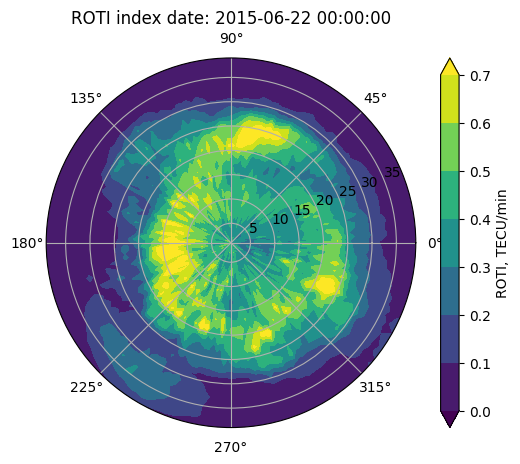

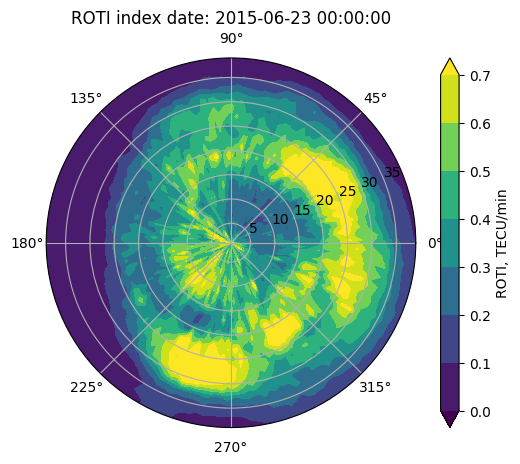

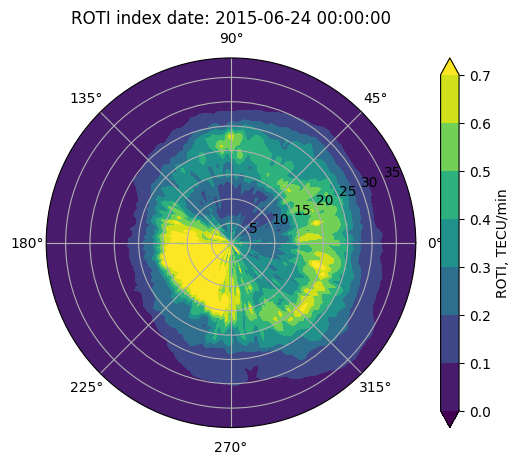

In [70]:
# example of ROTI map
# doy = ["020", "021", "022", "023", "024"]
doy = ["173", "174", "175"]
all_maps = []

for day in doy:
    filename = '../data/roti/2010-2020/roti' + day + '0.15f'

    lats = []
    rows = []

    date, lats, map = read_roti(filename)

    all_maps.append(map)
    all_map = np.mean(all_maps, axis=0)
    # print("all_map:\n", all_map.shape[1])
    lons = np.linspace(1, 361, all_map.shape[1])
    # lons = np.linspace(1, 361, 180)
    # print("lons:\n", lons)
    plot_data_roti(date, lons, lats, map)


In [97]:
file_dst = '../data/dst/WWW_dstae03359771.dat.txt'
dst_data = read_dst(file_dst)